In [72]:
import dag_utils as utils
from TopoGreedy import BUILDER_sigma
from Greedy_prune import full_greedy_and_prune

W_true, _, X, Theta = utils.simulate_sem(
    n_nodes=10,
    edges=4 * 10,
    n_samples=1000,
    graph_type="er",
    w_range=(0.5, 1),
    var=2,
)


In [73]:
import numpy as np
sigma_emp_cov = np.cov(X, rowvar = False)
# full_greedy_and_prune(X, sigma_emp_cov, k, threshold) 
prec = full_greedy_and_prune(X,sigma_emp_cov, 10, 1e-4)


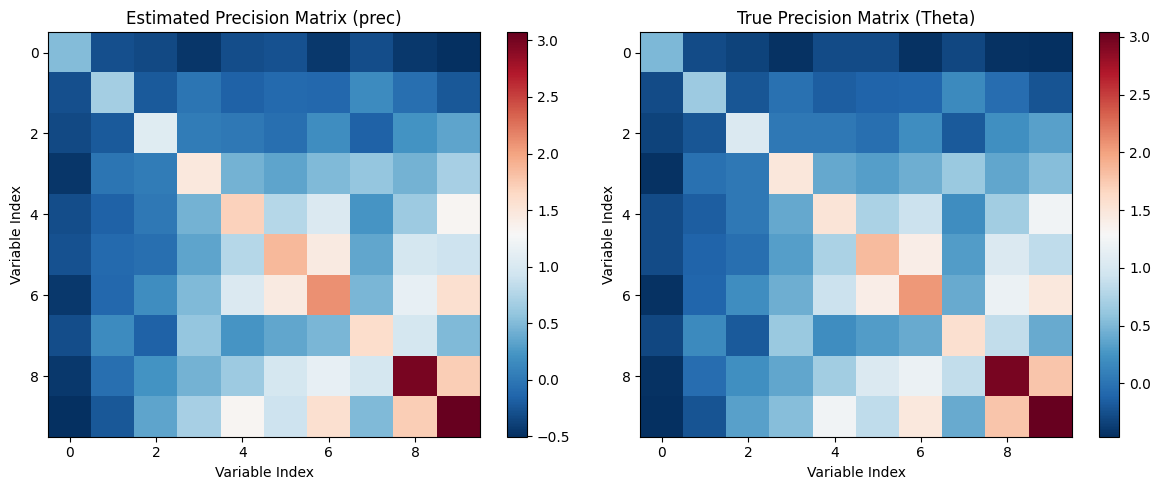

Normalized Frobenius norm: 0.061137


In [74]:
import matplotlib.pyplot as plt

# Create subplot with 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot prec (estimated precision matrix)
im1 = ax1.imshow(prec, cmap='RdBu_r', aspect='auto')
ax1.set_title('Estimated Precision Matrix (prec)')
ax1.set_xlabel('Variable Index')
ax1.set_ylabel('Variable Index')
plt.colorbar(im1, ax=ax1)

# Plot Theta (true precision matrix)
im2 = ax2.imshow(Theta, cmap='RdBu_r', aspect='auto')
ax2.set_title('True Precision Matrix (Theta)')
ax2.set_xlabel('Variable Index')
ax2.set_ylabel('Variable Index')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

# Calculate and print normalized Frobenius norm
fro_norm_diff = np.linalg.norm(prec - Theta, 'fro')
fro_norm_true = np.linalg.norm(Theta, 'fro')
normalized_fro_norm = fro_norm_diff / (fro_norm_true + 1e-12)

print(f"Normalized Frobenius norm: {normalized_fro_norm:.6f}")


In [ ]:
from TopoGreedy import BUILD

k_list = [10]
threshold_list = [1e-4]
topo_thr = 0.5
refresh_every = 0.1
var = 2.0

final = BUILD(X, sigma_emp_cov, k_list, threshold_list, topo_thr, refresh_every, var)
print(final['prec'])
print(final['A_est'])
print(final['A_est_bin'])
print(final['k'])
print(final['thr'])
# print(A_est_bin)


[[ 0.48820529 -0.28576467 -0.37756506 -0.42034656 -0.26331908 -0.3290218
  -0.28381424 -0.39298934 -0.40925731 -0.39970083]
 [-0.28576467  0.68191426 -0.04231371  0.25418074 -0.22092743  0.2112482
  -0.35037966  0.24099017 -0.24027016 -0.12785715]
 [-0.37756506 -0.04231371  0.95535062 -0.17445296 -0.10184915 -0.08670881
   0.09643438 -0.23063656  0.28363972  0.17696274]
 [-0.42034656  0.25418074 -0.17445296  1.32453343  0.4320043   0.59300449
   0.61189867  0.50271779  0.14968691  0.17130737]
 [-0.26331908 -0.22092743 -0.10184915  0.4320043   1.54130573  0.475458
   0.9082004   0.37811776  0.75196932  0.68289762]
 [-0.3290218   0.2112482  -0.08670881  0.59300449  0.475458    0.93792199
   0.11362833  0.59767026  0.04738535  0.15581119]
 [-0.28381424 -0.35037966  0.09643438  0.61189867  0.9082004   0.11362833
   1.64058666  0.24677712  0.82234483  0.62005739]
 [-0.39298934  0.24099017 -0.23063656  0.50271779  0.37811776  0.59767026
   0.24677712  2.26185091  1.14848937  1.07239719]
 [-0

In [71]:
final['A_est']

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

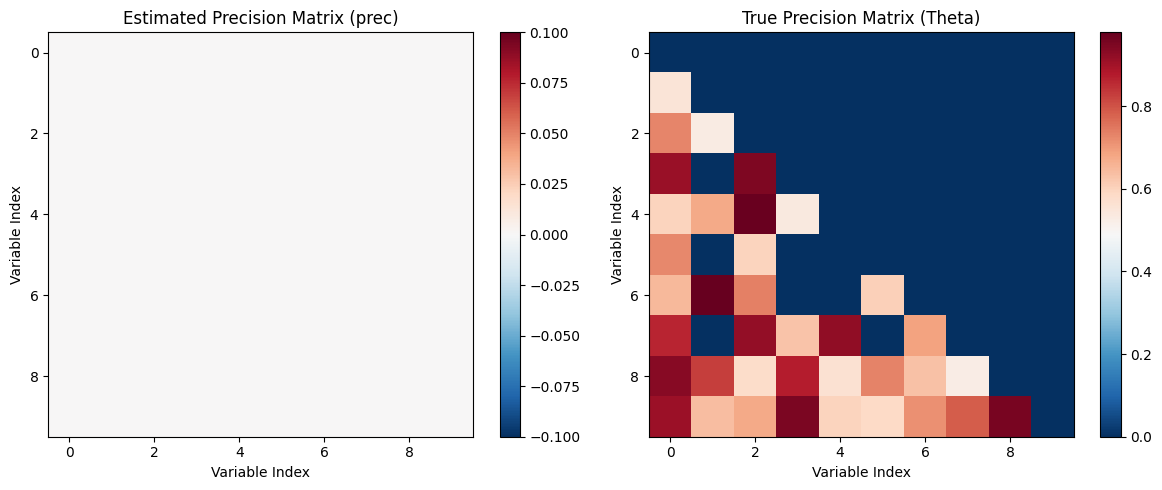

Normalized Frobenius norm: 1.000000


In [70]:
import matplotlib.pyplot as plt

# Create subplot with 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot prec (estimated precision matrix)
im1 = ax1.imshow(final['A_est'], cmap='RdBu_r', aspect='auto')
ax1.set_title('Estimated Precision Matrix (prec)')
ax1.set_xlabel('Variable Index')
ax1.set_ylabel('Variable Index')
plt.colorbar(im1, ax=ax1)

# Plot Theta (true precision matrix)
im2 = ax2.imshow(W_true, cmap='RdBu_r', aspect='auto')
ax2.set_title('True Precision Matrix (Theta)')
ax2.set_xlabel('Variable Index')
ax2.set_ylabel('Variable Index')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

# Calculate and print normalized Frobenius norm
fro_norm_diff = np.linalg.norm(final['A_est'] - W_true, 'fro')
fro_norm_true = np.linalg.norm(W_true, 'fro')
normalized_fro_norm = fro_norm_diff / (fro_norm_true + 1e-12)

print(f"Normalized Frobenius norm: {normalized_fro_norm:.6f}")
